# MACHINE LEARNING PROJECT

# CAR PRICE PREDICTION

In [159]:
# Problem Description: 

# A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 
# Essentially, the company wants to know: 
# Which variables are significant in predicting the price of a car 
# How well those variables describe the price of a car 
# Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 
# Business Goal: 
# You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to 
# understand the pricing dynamics of a new market. 
# Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link 

# Key components to be fulfilled: 
# 1. Loading and Preprocessing (5 marks) 
#  Load the dataset and perform necessary preprocessing steps. 
# 2. Model Implementation (10 marks) 
#  Implement the following five regression algorithms: 
#     1) Linear Regression 
#     2) Decision Tree Regressor 
#     3) Random Forest Regressor 
#     4) Gradient Boosting Regressor 
#     5) Support Vector Regressor 
# 3. Model Evaluation (5 marks) 
# Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). 
# Identify the best performing model and justify why it is the best.
# 4. Feature Importance Analysis (2 marks) 
# Identify the significant variables affecting car prices (feature selection) 
# 5. Hyperparameter Tuning (2 marks): 
# Perform hyperparameter tuning and check whether the performance of the model has increased. 

# 1. LOADING AND PREPROCESSING

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings("ignore")
import math

In [160]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [161]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [162]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [164]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [165]:
df.duplicated().sum()

0

In [166]:
# Dropping 'car_ID' as it's not useful
df.drop(columns=['car_ID'], inplace=True)


In [167]:
# Extracting car brand from 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Dropping the original 'CarName' column
df.drop(columns=['CarName'], inplace=True)

# Instead of dealing with full car names (which may not be consistently formatted), we now have a clean categorical feature ('CarBrand') that can be used in the model.

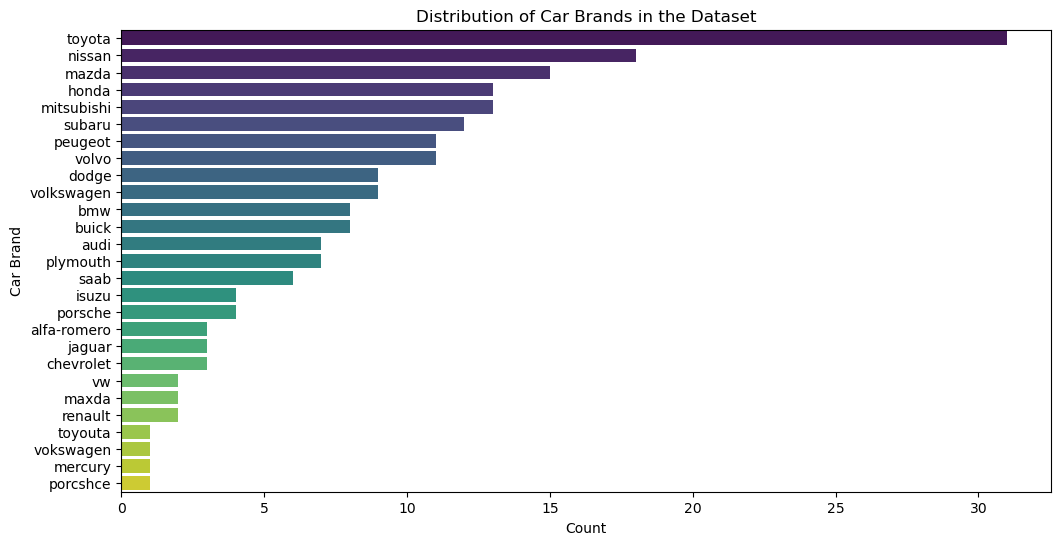

In [168]:
# Visualizing Car Brand Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['CarBrand'], order=df['CarBrand'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Car Brand")
plt.title("Distribution of Car Brands in the Dataset")
plt.show()

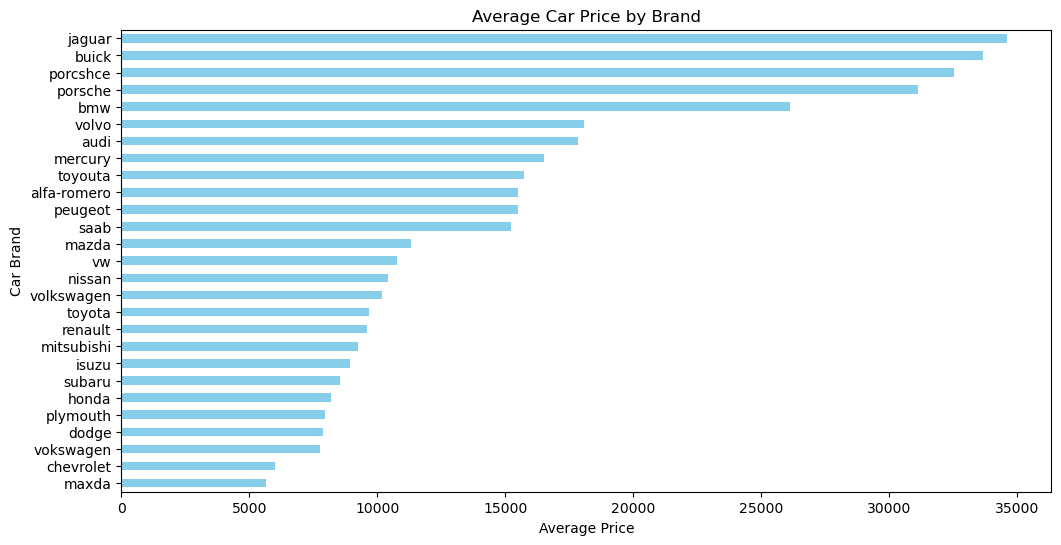

In [169]:
# Visualizing Car Price by Brand Distribution
plt.figure(figsize=(12, 6))
df.groupby('CarBrand')['price'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("Car Brand")
plt.title("Average Car Price by Brand")
plt.show()


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [170]:
# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']
Numerical Columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### SKEWENESS

In [124]:
# Checking for skewness in numerical features
skewed_features = df[numerical_columns].skew().sort_values(ascending=False)
print("Skewness of Numerical Features:\n", skewed_features)

Skewness of Numerical Features:
 compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64


In [171]:
# Applying log transformation to highly skewed features
for col in numerical_columns:
    if abs(df[col].skew()) > 1:
        df[col] = np.log1p(df[col])

In [172]:
# Checking skewness after transformation
new_skewed_features = df[numerical_columns].skew().sort_values(ascending=False)
print("Skewness of Numerical Features After Transformation:\n", new_skewed_features)

Skewness of Numerical Features After Transformation:
 compressionratio    2.379056
carwidth            0.904003
wheelbase           0.885024
enginesize          0.864706
curbweight          0.681398
price               0.672964
citympg             0.663704
highwaympg          0.539997
horsepower          0.489938
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64


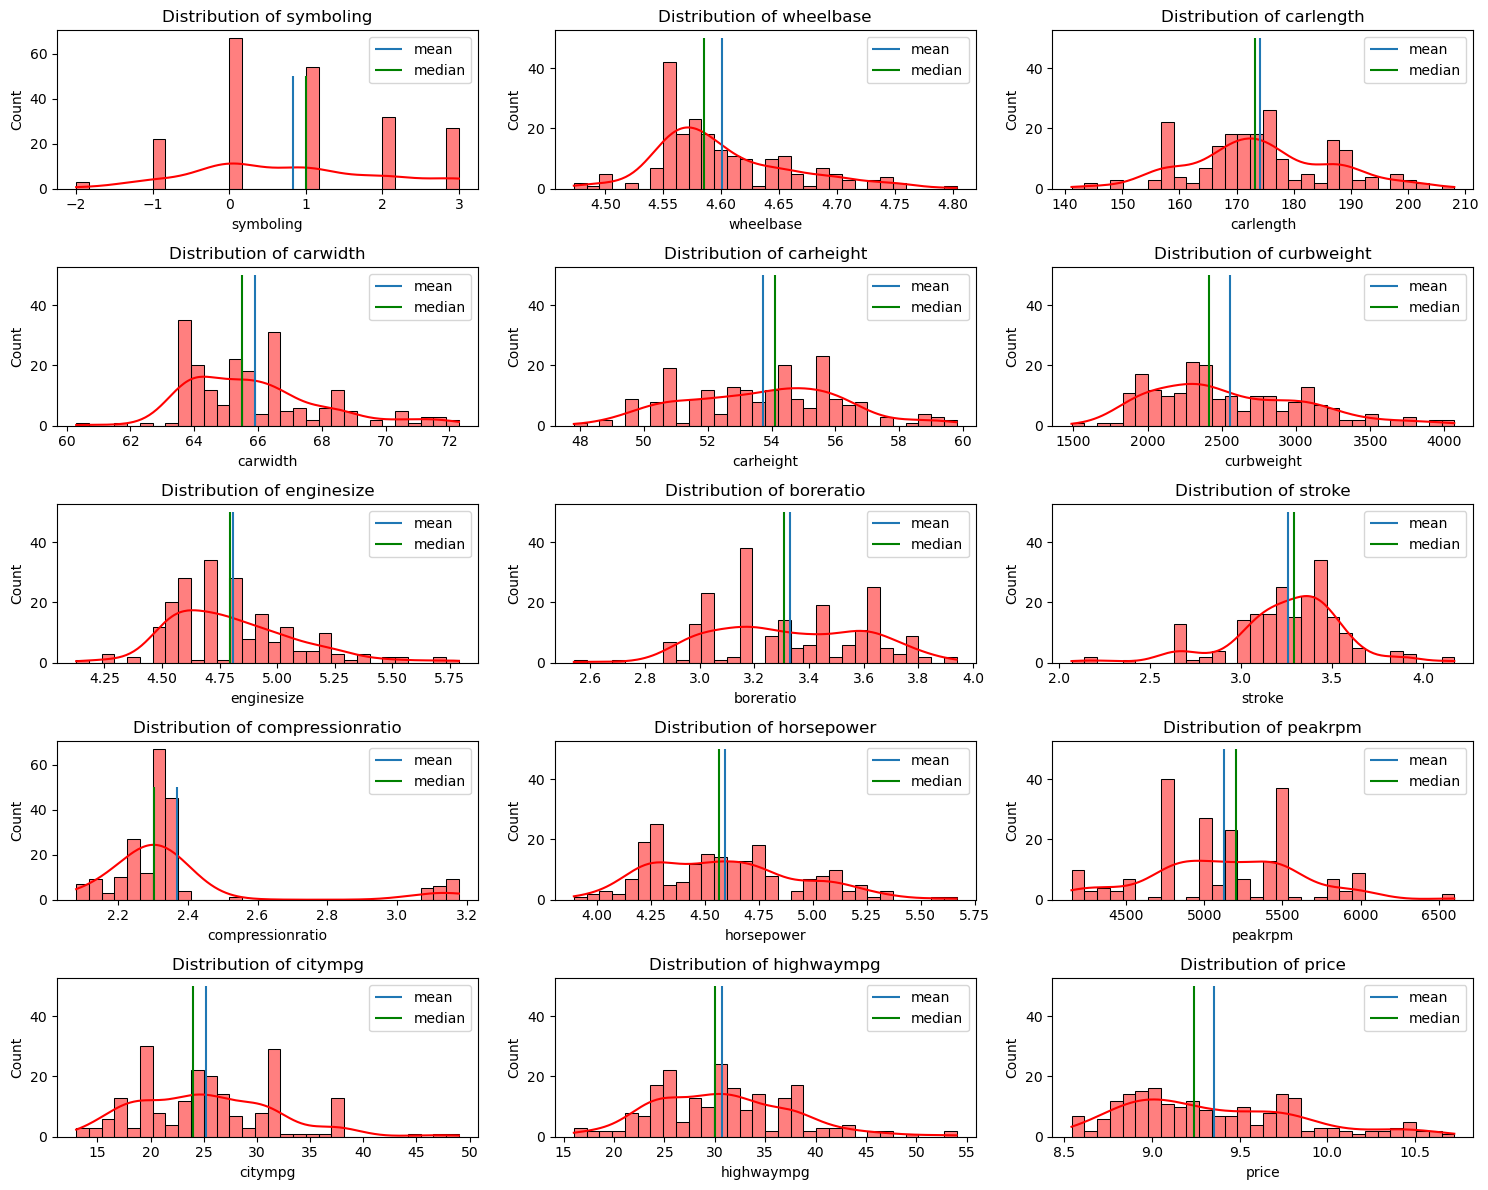

In [173]:
# Visualizing Distributions of Numerical Features
plt.figure(figsize=(15,12))  
for i, col in enumerate(numerical_columns):  # Loop through numerical columns
    plt.subplot(5, 3, i + 1)  # Creating subplots
    sns.histplot(df[col], bins=30, kde=True, color="red")  # Histogram with KDE curve
    plt.title(f"Distribution of {col}")  # Adding title

    # Adding vertical lines for mean and median
    plt.vlines(df[col].mean(), ymin=0, ymax=50, label="mean")  
    plt.vlines(df[col].median(), ymin=0, ymax=50, label="median", color='green')  
    plt.legend()  # Display legend
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

### OUTLIERS

In [174]:
# Outlier Detection using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1


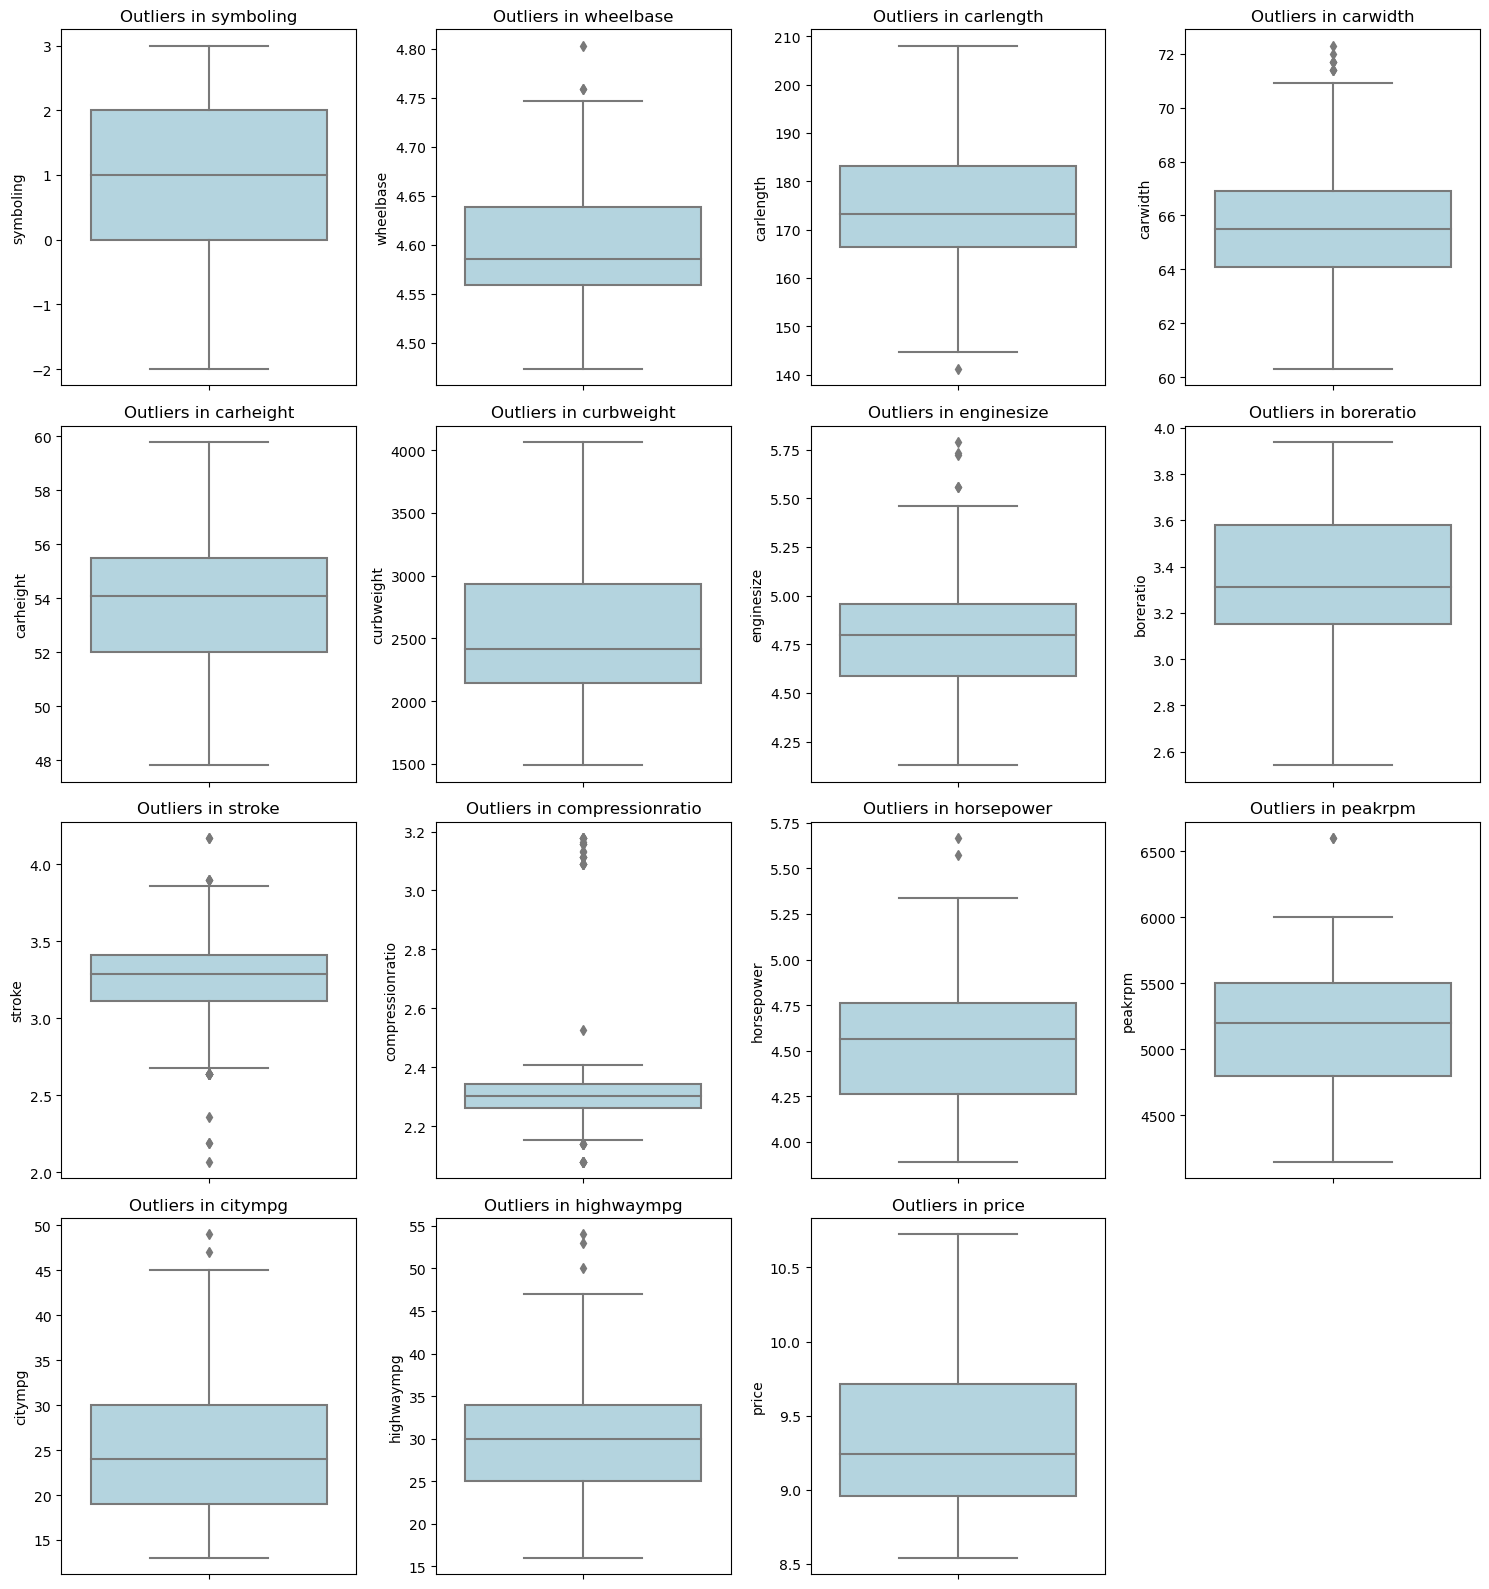

In [175]:
# Visualizing Outliers 

# Determine the number of rows and columns dynamically
num_features = len(numerical_columns)
num_cols = 4  # Set 4 columns
num_rows = math.ceil(num_features / num_cols)  # Adjust rows dynamically

# Visualizing Outliers Before Removal
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust rows based on num_features
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

In [176]:
# Removing extreme outliers
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


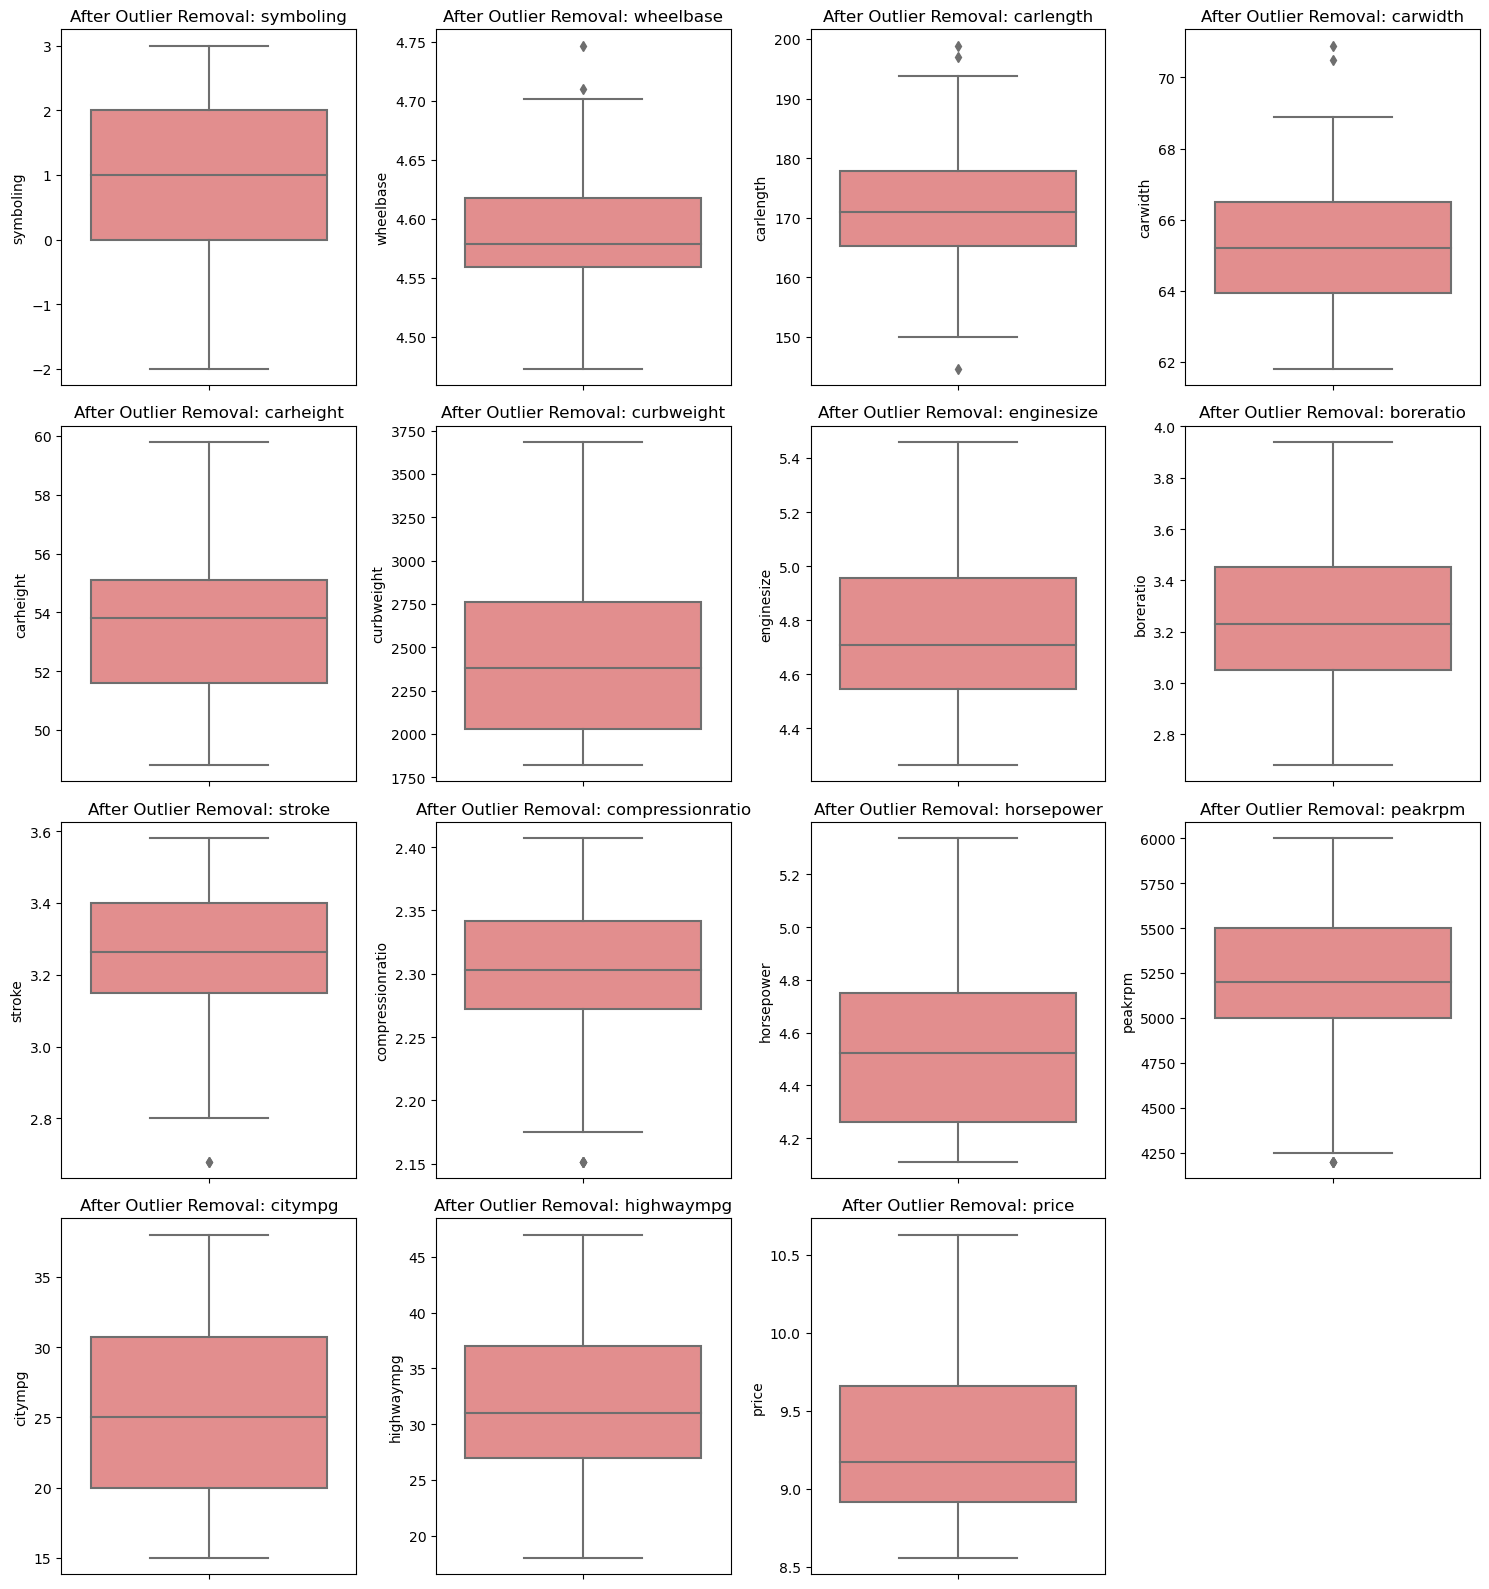

In [177]:
# Visualizing Outliers After Removal
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'After Outlier Removal: {col}')
plt.tight_layout()
plt.show()


### ENCODING CATEGORICAL DATA USING ONE-HOT ENCODING

In [179]:

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Applying One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the updated DataFrame
df.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porcshce,CarBrand_porsche,CarBrand_saab,CarBrand_toyota,CarBrand_toyouta,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3,4.495355,168.8,64.1,48.8,2548,4.875197,3.47,2.68,2.302585,...,0,0,0,0,0,0,0,0,0,0
1,3,4.495355,168.8,64.1,48.8,2548,4.875197,3.47,2.68,2.302585,...,0,0,0,0,0,0,0,0,0,0
2,1,4.559126,171.2,65.5,52.4,2823,5.030438,2.68,3.47,2.302585,...,0,0,0,0,0,0,0,0,0,0
3,2,4.613138,176.6,66.2,54.3,2337,4.700480,3.19,3.40,2.397895,...,0,0,0,0,0,0,0,0,0,0
4,2,4.609162,176.6,66.4,54.3,2824,4.919981,3.19,3.40,2.197225,...,0,0,0,0,0,0,0,0,0,0


### FEATURE SELECTION

In [180]:
# Feature Selection
# Defining Independent and Target Variables:
X = df.drop(columns=['price'])
y = df['price']

# Using SelectKBest for Feature Selection:
select_k = SelectKBest(score_func=f_regression, k=10)  # Selecting top 10 features for regression
X_selected = select_k.fit_transform(X, y)


In [181]:
# Extracting Selected Features:
# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

In [182]:
# Creating a DataFrame for Scores:
# Create DataFrame for feature scores(Stores the feature names and their scores.)
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)#Sorts them in descending order to see the most influential ones.


In [183]:
# Print Selected Features
print("Top 10 Selected Features:\n", feature_scores_df)


Top 10 Selected Features:
            Feature       Score
5       horsepower  527.414232
2       curbweight  376.780213
6          citympg  337.303679
7       highwaympg  296.364431
3       enginesize  264.654980
9  fuelsystem_mpfi  180.085123
4        boreratio  155.179507
1         carwidth  147.128174
0        carlength  130.130858
8   drivewheel_rwd  124.842257


In [184]:
# Splitting Data for Training and Testing:
# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [185]:
# Print training and testing data
print("\nTraining data (features):")
print(X_train)

print("\nTesting data (features):")
print(X_test)


Training data (features):
[[1.835e+02 6.770e+01 3.016e+03 ... 2.400e+01 1.000e+00 1.000e+00]
 [1.675e+02 6.520e+01 2.289e+03 ... 3.300e+01 0.000e+00 0.000e+00]
 [1.866e+02 6.650e+01 2.808e+03 ... 2.600e+01 0.000e+00 1.000e+00]
 ...
 [1.559e+02 6.360e+01 1.874e+03 ... 4.300e+01 0.000e+00 0.000e+00]
 [1.689e+02 6.500e+01 2.756e+03 ... 2.500e+01 1.000e+00 1.000e+00]
 [1.697e+02 6.360e+01 2.280e+03 ... 3.700e+01 0.000e+00 0.000e+00]]

Testing data (features):
[[1.65700000e+02 6.40000000e+01 2.22100000e+03 4.70048037e+00
  3.19000000e+00 4.51085951e+00 2.40000000e+01 2.90000000e+01
  0.00000000e+00 1.00000000e+00]
 [1.57300000e+02 6.38000000e+01 1.96700000e+03 4.51085951e+00
  2.97000000e+00 4.23410650e+00 3.10000000e+01 3.80000000e+01
  0.00000000e+00 0.00000000e+00]
 [1.86700000e+02 6.84000000e+01 3.02000000e+03 4.79579055e+00
  3.46000000e+00 4.58496748e+00 1.90000000e+01 2.40000000e+01
  1.00000000e+00 1.00000000e+00]
 [1.86600000e+02 6.65000000e+01 2.75800000e+03 4.80402104e+00
  3.54

In [186]:
# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2. MODEL IMPLEMENTATION

Implement the following five regression algorithms: 

     1) Linear Regression 
     2) Decision Tree Regressor 
     3) Random Forest Regressor 
     4) Gradient Boosting Regressor 
     5) Support Vector Regressor 

In [187]:
# Model Implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR()
}


# 3. MODEL EVALUATION

Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). 
Identify the best performing model and justify why it is the best.

In [189]:
# Training and evaluating models
model_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    
    model_results[name] = {"MAE": mae, "MSE": mse, "R2": r2, "RMSE": rmse}

In [191]:
# Display results
for model, metrics in model_results.items():
    print(f"{model}:\n R-squared: {metrics['R2']:.4f}\n MSE: {metrics['MSE']:.4f}\n MAE: {metrics['MAE']:.4f}\n RMSE: {metrics['RMSE']:.4f}\n")

Linear Regression:
 R-squared: 0.7749
 MSE: 0.0687
 MAE: 0.2112
 RMSE: 0.2622

Decision Tree:
 R-squared: 0.8983
 MSE: 0.0310
 MAE: 0.1258
 RMSE: 0.1762

Random Forest:
 R-squared: 0.9299
 MSE: 0.0214
 MAE: 0.1249
 RMSE: 0.1463

Gradient Boosting:
 R-squared: 0.9215
 MSE: 0.0240
 MAE: 0.1355
 RMSE: 0.1548

Support Vector Regressor:
 R-squared: 0.8540
 MSE: 0.0446
 MAE: 0.1734
 RMSE: 0.2112



In [192]:
# Identify the best and worst models based on R² score
best_model = max(model_results, key=lambda x: model_results[x]["R2"])
worst_model = min(model_results, key=lambda x: model_results[x]["R2"])

print("\nBest Model:", best_model)
print("Performance:", model_results[best_model])

print("\nWorst Model:", worst_model)
print("Performance:", model_results[worst_model])



Best Model: Random Forest
Performance: {'MAE': 0.12486857569268095, 'MSE': 0.02141346006223152, 'R2': 0.9298707013575966, 'RMSE': 0.14633338669706075}

Worst Model: Linear Regression
Performance: {'MAE': 0.2111670794342033, 'MSE': 0.06873273672761769, 'R2': 0.7748995908894476, 'RMSE': 0.2621692902069533}


#### FINDINGS:
##### BEST MODEL:Random Forest
* Highest R² Score – Explains the maximum variance in car price prediction.
* Lower MSE & MAE – More accurate predictions with lower errors.

# 4. FEATURE IMPORTANCE ANALYSIS

### Identify the significant variables affecting car prices (feature selection) 

In [197]:
# Feature Importance 
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 highwaympg         0.366389
horsepower         0.255541
curbweight         0.120610
citympg            0.066894
enginesize         0.062838
fuelsystem_mpfi    0.055457
carlength          0.032600
carwidth           0.029097
boreratio          0.005779
drivewheel_rwd     0.004796
dtype: float64


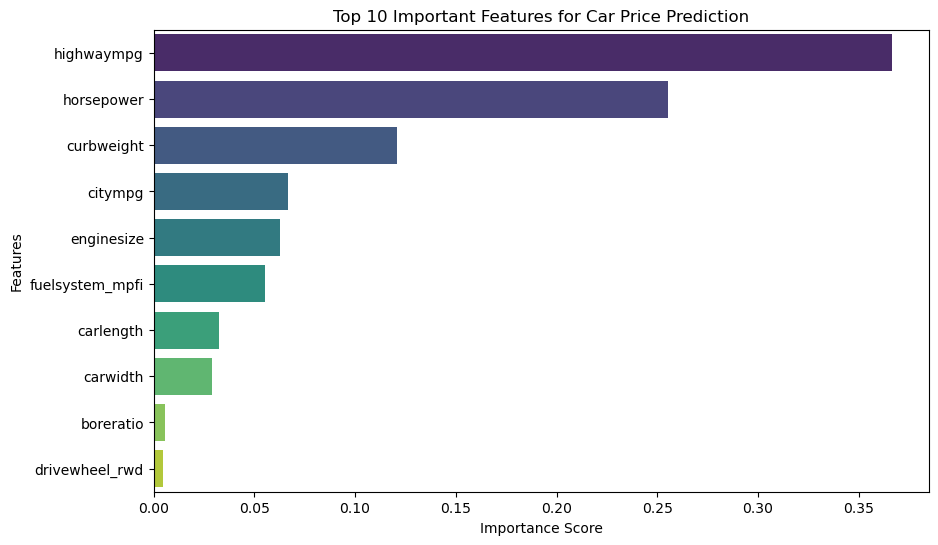

In [198]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette='viridis')
plt.title("Top 10 Important Features for Car Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

FINDINGS:

Highway MPG has the highest impact on price.

Performance factors (Horsepower, curbweight) significantly influence pricing.


# 5. HYPERPARAMETER TUNING

 ### Perform hyperparameter tuning and check whether the performance of the model has increased.?


#### Hyperparameter Tuning for Model Performance Improvement
#### Hyperparameter tuning helps optimize the model by finding the best combination of hyperparameters.
#### We will use GridSearchCV for Random Forest, as it performed well in our model evaluation.

In [201]:
from sklearn.model_selection import GridSearchCV

# Define models and hyperparameters
models = {
    "Decision Tree": (DecisionTreeRegressor(), {"max_depth": [3, 5, None]}),
    "Random Forest": (RandomForestRegressor(), {"n_estimators": [50, 100]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {"n_estimators": [50, 100]}),
    "SVR": (SVR(), {"C": [0.1, 1], "kernel": ["linear"]})
}

results = []

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)  # Ensure X is scaled
    best_model = grid.best_estimator_
    
    r2 = r2_score(y_test, best_model.predict(X_test_scaled))
    results.append({"Model": name, "Best Params": grid.best_params_, "R2 Score": r2})

# Display results
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("\  Model Comparison with Hyperparameter Tuning:")
print(results_df)

# Best model selection
best_model = results_df.iloc[0]
print(f"\n Best Model: {best_model['Model']} with R² = {best_model['R2 Score']:.4f}")
print(f"\n Best Parameters: {best_model['Best Params']}")



\  Model Comparison with Hyperparameter Tuning:
               Model                   Best Params  R2 Score
1      Random Forest          {'n_estimators': 50}  0.932806
2  Gradient Boosting         {'n_estimators': 100}  0.921488
0      Decision Tree              {'max_depth': 3}  0.915490
3                SVR  {'C': 1, 'kernel': 'linear'}  0.761530

 Best Model: Random Forest with R² = 0.9328

 Best Parameters: {'n_estimators': 50}


### FINDINGS:
#### Hyperparameter Tuning

To further improve model performance, we tuned Decision Tree, Random Forest, Gradient Boosting, and SVR models using GridSearchCV.

Best Performing Model After Tuning:Random Forest 